In [1]:
print("test")

test


In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns


# Data Cleaning
### - Handle null data, duplicate

##### Loading of HDB flat price from 2017 - 2023

In [3]:
hdb_data = pd.read_csv('HDB_dataset/completed_flat_price_2017_2023.csv')

In [4]:
hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987


In [5]:
#Initial: 146872 rows, 14 columns
hdb_data.shape

(146872, 14)

In [6]:
hdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146872 entries, 0 to 146871
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                146872 non-null  object 
 1   town                 146872 non-null  object 
 2   flat_type            146872 non-null  object 
 3   block                146872 non-null  object 
 4   street_name          146872 non-null  object 
 5   storey_range         146872 non-null  object 
 6   floor_area_sqm       146872 non-null  float64
 7   flat_model           146872 non-null  object 
 8   lease_commence_date  146872 non-null  int64  
 9   remaining_lease      146872 non-null  object 
 10  resale_price         146872 non-null  float64
 11  full_address         146872 non-null  object 
 12  Longitude            146842 non-null  float64
 13  Latitude             146872 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 15.7+ MB


In [7]:
hdb_data.duplicated().sum()

267

In [8]:
duplicated_rows = hdb_data.duplicated(keep=False)
duplicated = hdb_data[duplicated_rows]
duplicated

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,106 HENDERSON CRES Singapore,103.822396,1.288938
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,106 HENDERSON CRES Singapore,103.822396,1.288938
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,271 QUEEN ST Singapore,103.853981,1.300938
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,271 QUEEN ST Singapore,103.853981,1.300938
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0,265 TOH GUAN RD Singapore,103.744576,1.340698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140882,2022-11,WOODLANDS,4 ROOM,574A,WOODLANDS DR 16,04 TO 06,93.0,Model A,2018,94 years 08 months,525000.0,574A WOODLANDS DR 16 Singapore,103.797097,1.430111
141856,2022-12,HOUGANG,3 ROOM,1,HOUGANG AVE 3,10 TO 12,59.0,Improved,1975,51 years 08 months,320000.0,1 HOUGANG AVE 3 Singapore,103.892983,1.364173
141860,2022-12,HOUGANG,3 ROOM,1,HOUGANG AVE 3,10 TO 12,59.0,Improved,1975,51 years 08 months,320000.0,1 HOUGANG AVE 3 Singapore,103.892983,1.364173
142548,2022-12,SEMBAWANG,4 ROOM,120C,CANBERRA CRES,10 TO 12,93.0,Model A,2018,94 years 03 months,590000.0,120C CANBERRA CRES Singapore,103.832452,1.447033


##### Based on above result, the duplicated data is important. Dropping is not needed

In [9]:
hdb_data.isnull().sum()

month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
full_address            0
Longitude              30
Latitude                0
dtype: int64

In [10]:
null_val = hdb_data.isnull()
null = hdb_data[null_val.any(axis=1)]
null

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
1392,2017-02,BUKIT MERAH,5 ROOM,121A,KIM TIAN PL,10 TO 12,115.0,Improved,2001,83 years,810000.0,121A KIM TIAN PL Singapore,NaN,0.0
1395,2017-02,BUKIT MERAH,5 ROOM,121A,KIM TIAN PL,10 TO 12,115.0,Improved,2001,83 years,868000.0,121A KIM TIAN PL Singapore,NaN,0.0
5063,2017-04,JURONG WEST,EXECUTIVE,161,YUNG PING RD,04 TO 06,147.0,Apartment,1997,78 years 09 months,450000.0,161 YUNG PING RD Singapore,NaN,0.0
8329,2017-06,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,28 TO 30,101.0,Model A,2001,82 years 08 months,776000.0,121A KIM TIAN PL Singapore,NaN,0.0
8831,2017-06,JURONG WEST,EXECUTIVE,161,YUNG PING RD,01 TO 03,146.0,Maisonette,1997,78 years 07 months,500000.0,161 YUNG PING RD Singapore,NaN,0.0
10070,2017-07,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,01 TO 03,90.0,Model A,2001,82 years 07 months,645000.0,121A KIM TIAN PL Singapore,NaN,0.0
10566,2017-07,JURONG WEST,EXECUTIVE,161,YUNG PING RD,07 TO 09,148.0,Apartment,1997,78 years 06 months,540000.0,161 YUNG PING RD Singapore,NaN,0.0
11870,2017-08,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,13 TO 15,100.0,Model A,2001,82 years 07 months,725000.0,121A KIM TIAN PL Singapore,NaN,0.0
17314,2017-11,BUKIT MERAH,4 ROOM,121A,KIM TIAN PL,13 TO 15,100.0,Model A,2001,82 years 03 months,730000.0,121A KIM TIAN PL Singapore,NaN,0.0
17881,2017-11,JURONG WEST,EXECUTIVE,161,YUNG PING RD,04 TO 06,146.0,Apartment,1997,78 years 02 months,470000.0,161 YUNG PING RD Singapore,NaN,0.0


##### From the above, given that it is longtitude and 30 out of 14k, it is insignificant. Hence, will be remove

In [11]:
hdb_data.dropna(subset=['Longitude'], inplace=True)

In [12]:
# Updated rows
hdb_data.shape

(146842, 14)

##### Loading of HDB Consumer Price Index (CPI)

In [13]:
hdb_cpi = pd.read_csv('HDB_dataset/CPI_2000to2022Feb.csv')

In [14]:
hdb_cpi.head()

,Tranc_Yr,Tranc_Mth,CPI Housing
0,2000,January,75.962
1,2000,February,75.961
2,2000,March,75.961
3,2000,April,75.962
4,2000,May,75.962


In [15]:
#Initial: 278 rows, 3 columns
hdb_cpi.shape

(278, 3)

In [16]:
hdb_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tranc_Yr     278 non-null    int64  
 1   Tranc_Mth    278 non-null    object 
 2   CPI Housing  278 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [17]:
hdb_cpi.duplicated().sum()

0

In [18]:
hdb_cpi.isnull().sum()

Tranc_Yr       0
Tranc_Mth      0
CPI Housing    0
dtype: int64

# Data transformation
### - Outlier

## Data preprocessing 

<AxesSubplot: >

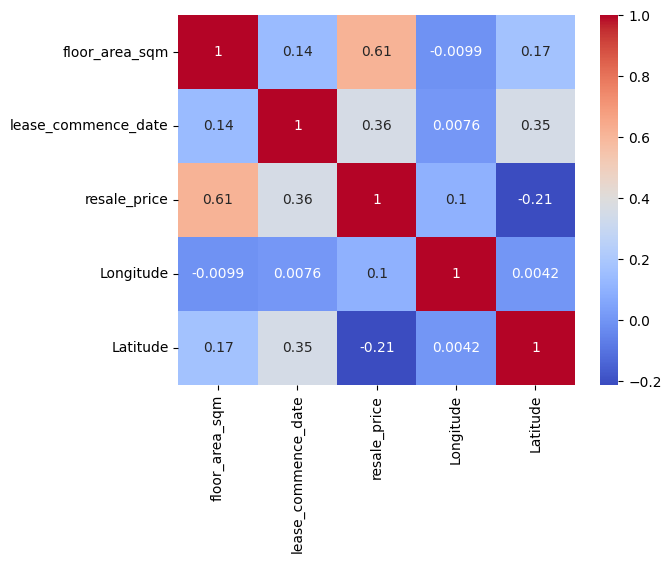

In [34]:
float_int = hdb_data.select_dtypes(include=['float64', 'int64'])

#Finding the correlation between the columns
corr_matrix = float_int.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
